In [1]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [2]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 65.4MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 27.0MB/s]
  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 11.3MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 65.2MB/s]


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('display.max_rows',1000)
pd.set_option('display.max_columns',1000)
df = pd.read_csv('train.csv')
df.drop(['Id'], axis = 1, inplace = True)
df.columns.values
X = df.loc[:,'MSSubClass':'SaleCondition']
y = df['SalePrice']

In [0]:
class Utility:
  def __init__(self):
    pass
  def set_data(self, dataframe):
    self.df = dataframe
  def aggregate(self, column_names):
    pass

In [5]:
import seaborn as sns
from sklearn.impute import SimpleImputer
X.columns.values

array(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDriv

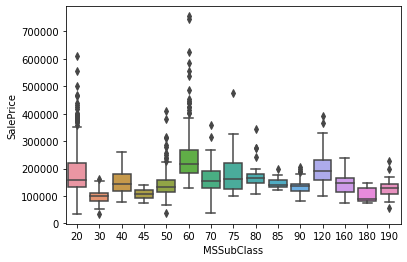

In [6]:
sns.boxplot(x = 'MSSubClass', y = 'SalePrice', data = df)


In [0]:
# X[feature]

In [8]:
######CHECK FOR MISSING VALUES
null_cols = df.columns[df.isnull().any()].tolist()
print(null_cols)
# from sklearn.impute import SimpleImputer
# imp_median = SimpleImputer(strategy = 'median')
# X = imp_median.fit_transform(X)

['LotFrontage', 'Alley', 'MasVnrType', 'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [9]:
k = ['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for j in k:
  print(df[j].unique())

['Gd' 'TA' 'Ex' nan 'Fa']
['TA' 'Gd' nan 'Fa' 'Po']
['No' 'Gd' 'Mn' 'Av' nan]
['GLQ' 'ALQ' 'Unf' 'Rec' 'BLQ' nan 'LwQ']
['Unf' 'BLQ' nan 'ALQ' 'Rec' 'LwQ' 'GLQ']


In [10]:
print(df[null_cols].head(8))

   LotFrontage Alley MasVnrType  MasVnrArea BsmtQual BsmtCond BsmtExposure  \
0         65.0   NaN    BrkFace       196.0       Gd       TA           No   
1         80.0   NaN       None         0.0       Gd       TA           Gd   
2         68.0   NaN    BrkFace       162.0       Gd       TA           Mn   
3         60.0   NaN       None         0.0       TA       Gd           No   
4         84.0   NaN    BrkFace       350.0       Gd       TA           Av   
5         85.0   NaN       None         0.0       Gd       TA           No   
6         75.0   NaN      Stone       186.0       Ex       TA           Av   
7          NaN   NaN      Stone       240.0       Gd       TA           Mn   

  BsmtFinType1 BsmtFinType2 Electrical FireplaceQu GarageType  GarageYrBlt  \
0          GLQ          Unf      SBrkr         NaN     Attchd       2003.0   
1          ALQ          Unf      SBrkr          TA     Attchd       1976.0   
2          GLQ          Unf      SBrkr          TA     Attchd  

In [0]:
df[null_cols].isnull().sum() > df.shape[0]/2
cols = ['Alley', 'PoolQC', 'Fence', 'MiscFeature']
df.drop(columns=cols, axis = 1, inplace=True)

In [0]:
strategies = {'LotFrontage':'median','MasVnrType':'None','MasVnrArea':0.0,'BsmtQual':'NB','BsmtCond':'NB','BsmtExposure':'NB','BsmtFinType1':'NB','BsmtFinType2':'NB','Electrical':'SBrkr','FireplaceQu':'NF','GarageType':'NG','GarageYrBlt':0,'GarageFinish':'NG','GarageQual':'NG','GarageCond':'NG'}

In [0]:
for col in cols:
  null_cols.remove(col)

In [0]:
for col in null_cols:
  if strategies[col] == 'median':
    si = SimpleImputer(strategy = 'median')
    df[col] = si.fit_transform(np.array(df[col]).reshape(-1,1))
  else:
    si = SimpleImputer(strategy = 'constant', fill_value = strategies[col])
    df[col] = si.fit_transform(np.array(df[col]).reshape(-1,1))

In [15]:
np.array(df.loc[df['GarageType']=='NG','GarageType']).shape, np.array(df.loc[df['GarageQual'] == 'NG',:]).shape

((81,), (81, 76))

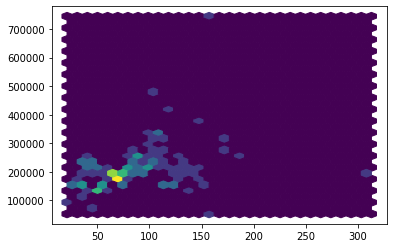

In [16]:
feature = 'LotFrontage'

chop_data = df.loc[:,[feature, 'SalePrice']]
agg_data = chop_data.groupby([feature]).aggregate({feature:'max', 'SalePrice':np.mean})
plt.hexbin(agg_data[feature], agg_data['SalePrice'], gridsize=30)

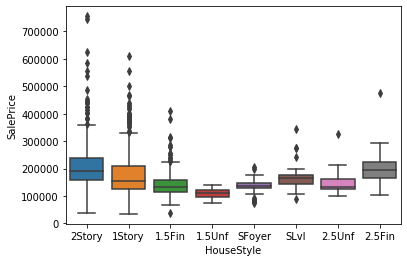

In [17]:
sns.boxplot(x = 'HouseStyle', y = 'SalePrice', data = df)

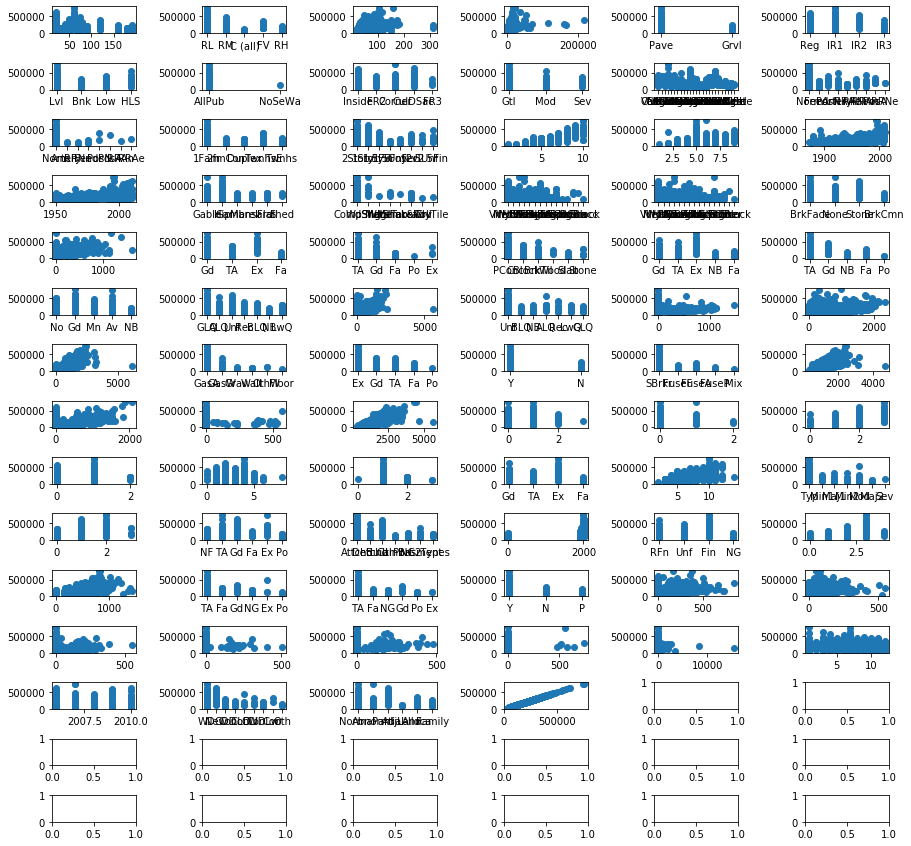

In [18]:
fig, ax = plt.subplots(15, 6,figsize=(15,15))
fig.subplots_adjust(hspace=1.1, wspace=0.8)
k = 0
for i in range(15):
  for j in range(6):
    if k<76:
      ax[i,j].scatter(df.iloc[:,k],df['SalePrice'])
      k+=1

In [19]:
numeric_cols = np.array(df._get_numeric_data().columns)
categorical_cols = np.setdiff1d(df.columns.values, numeric_cols)
print(df[categorical_cols])

     BldgType BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2 BsmtQual  \
0        1Fam       TA           No          GLQ          Unf       Gd   
1        1Fam       TA           Gd          ALQ          Unf       Gd   
2        1Fam       TA           Mn          GLQ          Unf       Gd   
3        1Fam       Gd           No          ALQ          Unf       TA   
4        1Fam       TA           Av          GLQ          Unf       Gd   
...       ...      ...          ...          ...          ...      ...   
1455     1Fam       TA           No          Unf          Unf       Gd   
1456     1Fam       TA           No          ALQ          Rec       Gd   
1457     1Fam       Gd           No          GLQ          Unf       TA   
1458     1Fam       TA           Mn          GLQ          Rec       TA   
1459     1Fam       TA           No          BLQ          LwQ       TA   

     CentralAir Condition1 Condition2 Electrical ExterCond ExterQual  \
0             Y       Norm       Norm  

In [20]:
print("{}".format(2))

2


In [34]:
!pip install statsmodel

ERROR: Could not find a version that satisfies the requirement statsmodel (from versions: none)
ERROR: No matching distribution found for statsmodel


((array([-3.30513952, -3.04793228, -2.90489705, ...,  2.90489705,
          3.04793228,  3.30513952]),
  array([10.46024211, 10.47194981, 10.54270639, ..., 13.34550693,
         13.5211395 , 13.53447303])),
 (0.3982622308161888, 12.024050901109383, 0.9953761475636613))

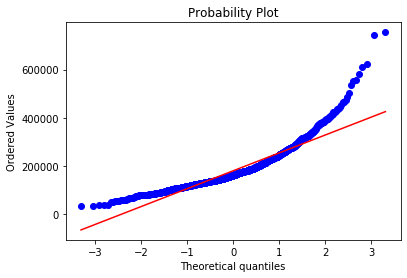

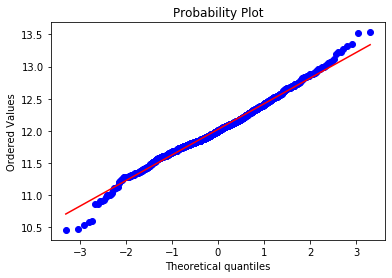

In [38]:
import scipy.stats as stats
measurements = y
stats.probplot(measurements, dist="norm", plot=plt)
plt.figure()
measurements = [np.log(i) for i in y]
stats.probplot(measurements, dist="norm", plot=plt)

In [21]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
sc = StandardScaler()
i = 0
d = {}
for col in categorical_cols:
  d["le_{}".format(i)] = LabelEncoder()
  df[col] = (d["le_{}".format(i)]).fit_transform(df[col])
  i+=1
print(d)
# df = sc.fit_transform(df)

{'le_0': LabelEncoder(), 'le_1': LabelEncoder(), 'le_2': LabelEncoder(), 'le_3': LabelEncoder(), 'le_4': LabelEncoder(), 'le_5': LabelEncoder(), 'le_6': LabelEncoder(), 'le_7': LabelEncoder(), 'le_8': LabelEncoder(), 'le_9': LabelEncoder(), 'le_10': LabelEncoder(), 'le_11': LabelEncoder(), 'le_12': LabelEncoder(), 'le_13': LabelEncoder(), 'le_14': LabelEncoder(), 'le_15': LabelEncoder(), 'le_16': LabelEncoder(), 'le_17': LabelEncoder(), 'le_18': LabelEncoder(), 'le_19': LabelEncoder(), 'le_20': LabelEncoder(), 'le_21': LabelEncoder(), 'le_22': LabelEncoder(), 'le_23': LabelEncoder(), 'le_24': LabelEncoder(), 'le_25': LabelEncoder(), 'le_26': LabelEncoder(), 'le_27': LabelEncoder(), 'le_28': LabelEncoder(), 'le_29': LabelEncoder(), 'le_30': LabelEncoder(), 'le_31': LabelEncoder(), 'le_32': LabelEncoder(), 'le_33': LabelEncoder(), 'le_34': LabelEncoder(), 'le_35': LabelEncoder(), 'le_36': LabelEncoder(), 'le_37': LabelEncoder(), 'le_38': LabelEncoder()}


In [65]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from scipy.stats import norm, skew, probplot
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.feature_selection import RFECV
# req_cols = df.columns.values
X = df.iloc[:,:df.shape[1]-1]

skewness = X.apply(lambda x: skew(x)).sort_values(ascending=False)

skewness_df = pd.DataFrame({'Skewness': skewness})
print(skewness_df.head(10))
from scipy.special import boxcox1p
boxcox_features = skewness_df[np.abs(skewness_df['Skewness'])>0.75].index
print(boxcox_features)
lam = 0.15
for col in boxcox_features:
    X.loc[:, col] = boxcox1p(X[col], lam)
skewness2 = X.apply(lambda x: skew(x)).sort_values(ascending=False)

skewness_df2 = pd.DataFrame({'Skewness': skewness2})
skewness_df2.head(10)

               Skewness
Utilities     38.170678
MiscVal       24.451640
PoolArea      14.813135
Condition2    13.158307
LotArea       12.195142
3SsnPorch     10.293752
Heating        9.844972
LowQualFinSF   9.002080
RoofMatl       8.101068
LandSlope      4.808735
Index(['Utilities', 'MiscVal', 'PoolArea', 'Condition2', 'LotArea',
       '3SsnPorch', 'Heating', 'LowQualFinSF', 'RoofMatl', 'LandSlope',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'EnclosedPorch', 'Condition1', 'MasVnrArea', 'LotFrontage',
       'OpenPorchSF', 'BldgType', 'BsmtFinSF1', 'WoodDeckSF', 'TotalBsmtSF',
       'RoofStyle', 'MSSubClass', '1stFlrSF', 'GrLivArea', 'BsmtUnfSF',
       '2ndFlrSF', 'BsmtExposure', 'LotConfig', 'KitchenQual', 'MSZoning',
       'ExterQual', 'ExterCond', 'SaleCondition', 'BsmtCond', 'Electrical',
       'LandContour', 'BsmtFinType2', 'GarageQual', 'PavedDrive', 'CentralAir',
       'GarageCond', 'SaleType', 'GarageYrBlt', 'Functional', 'Street'],
      dt

,Skewness
Utilities,38.170678
PoolArea,14.363418
Heating,8.059149
3SsnPorch,7.827826
RoofMatl,7.643284
LowQualFinSF,7.593301
MiscVal,5.505530
LandSlope,4.345857
KitchenAbvGr,3.995746
BsmtHalfBath,3.943685


In [78]:

y = [np.log(k) for k in df.iloc[:,df.shape[1]-1]]
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
rf = RandomForestRegressor(n_estimators = 100)
rf.fit(x_train, y_train)
gbrt = GradientBoostingRegressor( n_estimators = 5000, loss = 'huber')
gbrt.fit(x_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='huber', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=5000,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [57]:
importances = gbrt.feature_importances_
indices = np.argsort(rf.feature_importances_)[::-1]
req_cols = df.columns.values[indices[:9]]
print(req_cols)

['OverallQual' 'GrLivArea' 'GarageCars' 'TotalBsmtSF' 'GarageArea'
 '1stFlrSF' 'GarageType' 'BsmtFinSF1' 'OverallCond']


([<matplotlib.axis.XTick at 0x7f8fe284b940>,
 <a list of 9 Text xticklabel objects>)

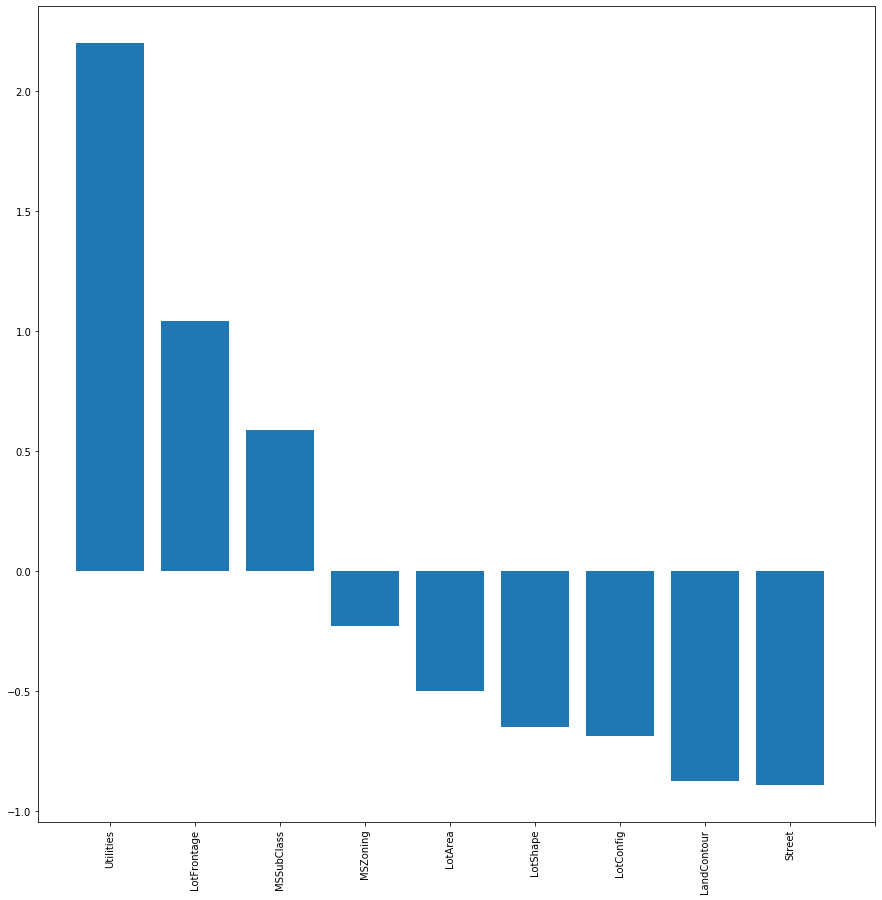

In [47]:
sc = StandardScaler()
importances = sc.fit_transform(importances.reshape(-1,1))
importances = importances.ravel()
%matplotlib inline
plt.figure(figsize=(15,15))
plt.bar(range(x_train.shape[1]),importances[indices], align='center', width = 0.8)

plt.xticks(range(x_train.shape[1] + 1), req_cols, rotation=90)

In [0]:
print(importances[indices][:10])

[0.58300277 0.08860418 0.03387746 0.03139635 0.02963236 0.02736872
 0.0199871  0.01815211 0.01266841 0.00976944]


In [0]:
import sklearn
sorted(sklearn.metrics.SCORERS.keys())

In [0]:
rfecv = RFECV(estimator=gbrt, step=1, scoring="neg_mean_squared_error")
rfecv.fit(X, y)

In [0]:
rfecv.n_features_

In [0]:
l = (rfecv.support_).tolist()
col_names = df.columns.values.tolist()
req_cols = []
for k in range(len(l)):
  if l[k] == True:
      req_cols.append(col_names[k])
print(len(req_cols), req_cols)

37 ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'OverallCond', 'RoofStyle', 'Exterior2nd', 'MasVnrArea', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtFinType1', 'BsmtFinType2', 'BsmtFinSF2', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Functional', 'Fireplaces', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageCond']


0.1298127028380931


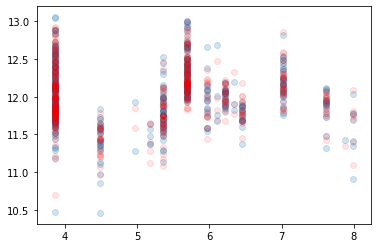

In [79]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, mean_squared_error
y_preds = gbrt.predict(x_test)
mse = np.sqrt(mean_squared_error(y_test, y_preds))
plt.scatter(x_test['MSSubClass'], y_test, alpha = 0.2)
plt.scatter(x_test['MSSubClass'], y_preds, color = 'red', alpha = 0.1)
print(mse)

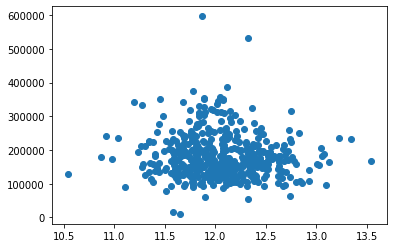

In [41]:
plt.scatter(y_test, y_preds)


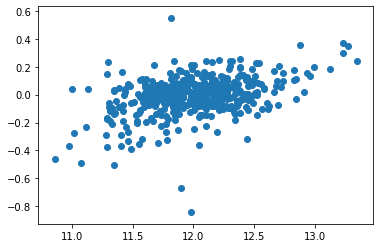

In [72]:
############### RESIDUAL PLOT ###############
plt.scatter(y_test, y_test - y_preds)

In [0]:
test_data = pd.read_csv('test.csv')
test_data.drop(columns=cols, axis = 1, inplace=True)
test_null = (test_data.columns[test_data.isnull().any()]).tolist()
print(np.setdiff1d(np.array(test_null), null_cols))


['BsmtFinSF1' 'BsmtFinSF2' 'BsmtFullBath' 'BsmtHalfBath' 'BsmtUnfSF'
 'Exterior1st' 'Exterior2nd' 'Functional' 'GarageArea' 'GarageCars'
 'KitchenQual' 'MSZoning' 'SaleType' 'TotalBsmtSF' 'Utilities']


In [0]:
test_data = pd.read_csv('test.csv')

test_data.drop(columns=cols, axis = 1, inplace=True)
for col in null_cols:
  if strategies[col] == 'median':
    si = SimpleImputer(strategy = 'median')
    test_data[col] = si.fit_transform(np.array(test_data[col]).reshape(-1,1))
  else:
    si = SimpleImputer(strategy = 'constant', fill_value = strategies[col])
    test_data[col] = si.fit_transform(np.array(test_data[col]).reshape(-1,1))
i=0
for col in categorical_cols:
  le = LabelEncoder()
  test_data[col] = le.fit_transform(test_data[col])
  i+=1
test_data = test_data[req_cols]
y_test_preds = gbrt.predict(test_data)

TypeError: ignored